## Importing necessary packages

In [1]:
# import all the modules
from supervised.regression import *
from supervised.classification import *
from unsupervised import *
from utils import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Regression Tasks

### 1. Linear Regression

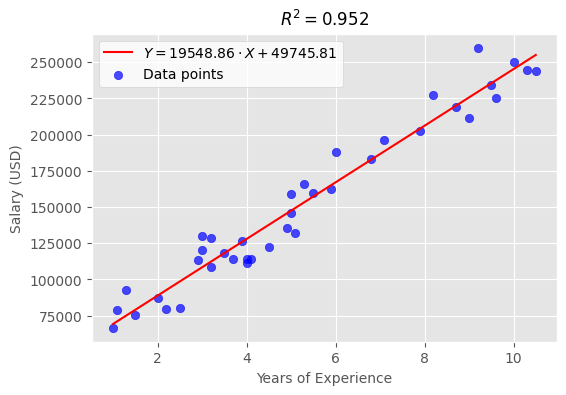

In [2]:
df = pd.read_csv('sample_dataset/salary.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Fit model
model = LinearRegression()
model.fit(X, y)

# Predict
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot results
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(X, y_pred, color='red', label='$Y = %.2f \cdot X + %.2f$' % (model.get_coef()[0], model.get_intercept()))
ax.scatter(X, y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Data points')
ax.set_ylabel('Salary (USD)', fontsize=10)
ax.set_xlabel('Years of Experience', fontsize=10)
ax.text(0.8, 0.1, '' % r2, ha='center', va='center', transform=ax.transAxes, color='red', fontsize=10)
ax.legend(facecolor='white', fontsize=10)
ax.set_title('$R^2= %.3f$' % r2, fontsize=12)
plt.show()

### 2. Ridge regression

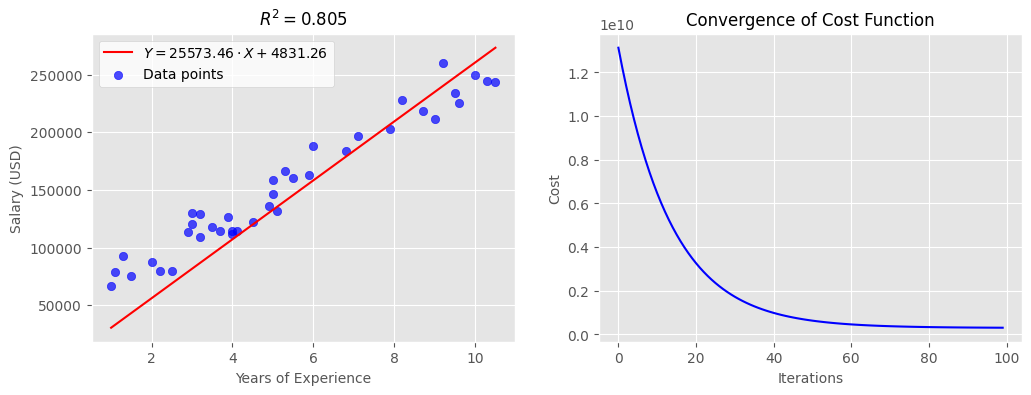

In [3]:
df = pd.read_csv('sample_dataset/salary.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Fit model
model_lasso = LinearRegression(learning_rate=0.001, n_iters=100, gradient_descent=True, regularizer='l1')
model_lasso.fit(X, y)

# Predict
y_pred = model_lasso.predict(X)
r2 = r2_score(y, y_pred)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].plot(X, y_pred, color='red', label='$Y = %.2f \cdot X + %.2f$' % (model_lasso.get_coef()[0], model_lasso.get_intercept()))
ax[0].scatter(X, y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Data points')
ax[0].set_ylabel('Salary (USD)', fontsize=10)
ax[0].set_xlabel('Years of Experience', fontsize=10)
ax[0].text(0.8, 0.1, '' % r2, ha='center', va='center', transform=ax[0].transAxes, color='red', fontsize=10)
ax[0].legend(facecolor='white', fontsize=10)
ax[0].set_title('$R^2= %.3f$' % r2, fontsize=12)

ax[1].plot(model_lasso.cost_history, color='blue')
ax[1].set_ylabel('Cost', fontsize=10)
ax[1].set_xlabel('Iterations', fontsize=10)
ax[1].set_title('Convergence of Cost Function', fontsize=12)
plt.show()

### 2. Polynomial Regression

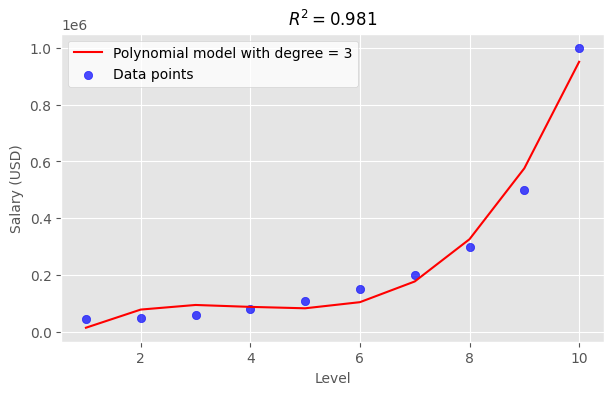

In [4]:
df = pd.read_csv('sample_dataset/Position_Salaries.csv')
X = df['Level'].values.reshape(-1, 1)
y = df['Salary'].values

# Fit model
model = PolynomialRegression(degree=3)
model.fit(X, y)

# Predict
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot results
fig, ax = plt.subplots(figsize=(7, 4))
ax.plot(X, y_pred, color='red', label='Polynomial model with degree = {}'.format(model.degree))
ax.scatter(X, y, edgecolor='blue', facecolor='blue', alpha=0.7, label='Data points')
ax.set_ylabel('Salary (USD)', fontsize=10)
ax.set_xlabel('Level', fontsize=10)
ax.text(0.8, 0.1, '' % r2, ha='center', va='center', transform=ax.transAxes, color='red', fontsize=10)
ax.legend(facecolor='white', fontsize=10)
ax.set_title('$R^2= %.3f$' % r2, fontsize=12)
plt.show()

## Classification

In [5]:
df = pd.read_csv('sample_dataset/breast_cancer.csv')
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
y = np.where(y == 'M', 1, 0)

# Normalize
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### 1. Logistic Regression

Accuracy: 0.947


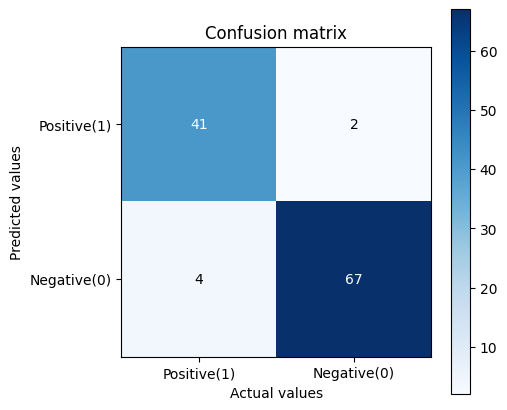

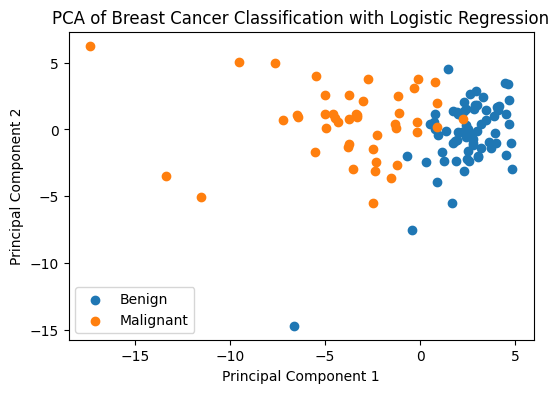

In [6]:
# Fit model
model = LogisticRegression(learning_rate=0.001, max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %0.3f' % accuracy)

# Plot results
plot_confusion_matrix(y_test, y_pred)
pca = PCA(n_components=2).fit_transform(X_test)

# Plot in 2D
legend_items = ['Benign', 'Malignant']
colors = plt.cm.get_cmap('tab10')
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(2):
    ax.scatter(pca[y_test == i, 0], pca[y_test == i, 1], color=colors(i), label=legend_items[i])
plt.legend(facecolor='white', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Classification with Logistic Regression')
plt.show()


### 2. Naive Bayes classification

Accuracy: 0.939


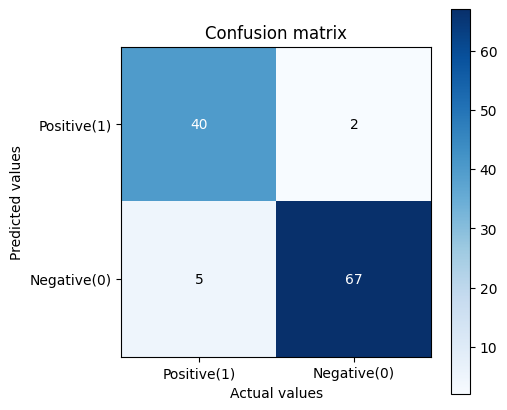

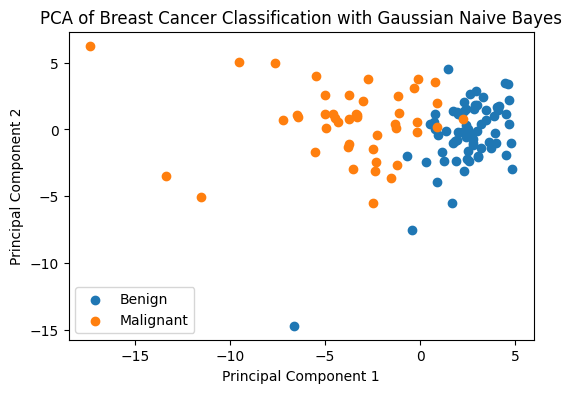

In [7]:
# Fit model
model = GaussianNB()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f" % accuracy)

# Plot results
plot_confusion_matrix(y_test, y_pred)

# Plot in 2D
legend_items = ['Benign', 'Malignant']
colors = plt.cm.get_cmap('tab10')
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(2):
    ax.scatter(pca[y_test == i, 0], pca[y_test == i, 1],
               color=colors(i), label=legend_items[i])
plt.legend(facecolor='white', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Classification with Gaussian Naive Bayes')
plt.show()

### 3. K-Nearest Neighbors

Accuracy: 0.956


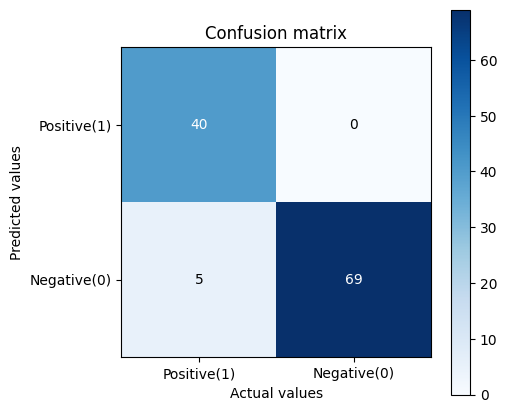

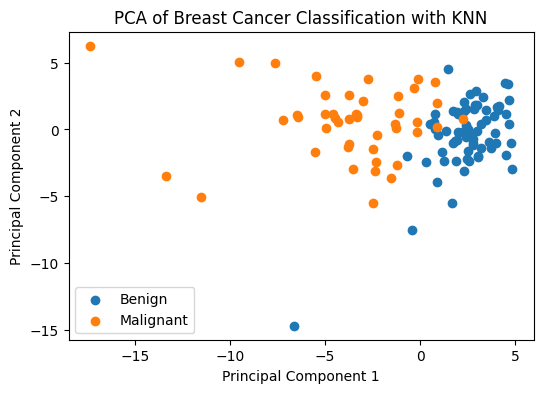

In [8]:
# Fit model
model = KNN(k=4)
model.fit(X_train, y_train)

# Predict
y_pred = np.array(model.predict(X_test))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f" % accuracy)

# Plot results
plot_confusion_matrix(y_test, y_pred)

# Plot in 2D
legend_items = ['Benign', 'Malignant']
colors = plt.cm.get_cmap('tab10')
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(2):
    ax.scatter(pca[y_test == i, 0], pca[y_test == i, 1],
               color=colors(i), label=legend_items[i])
plt.legend(facecolor='white', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Classification with KNN')
plt.show()

### 4. Support Vector Machines

Accuracy: 0.965


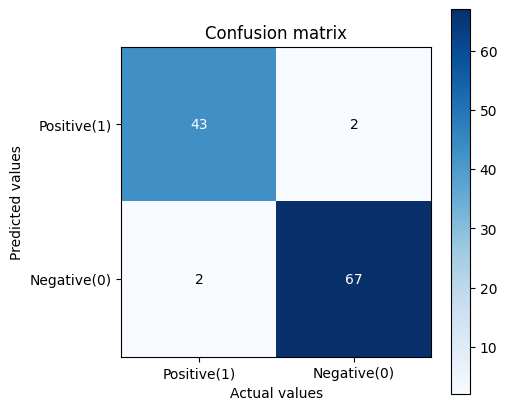

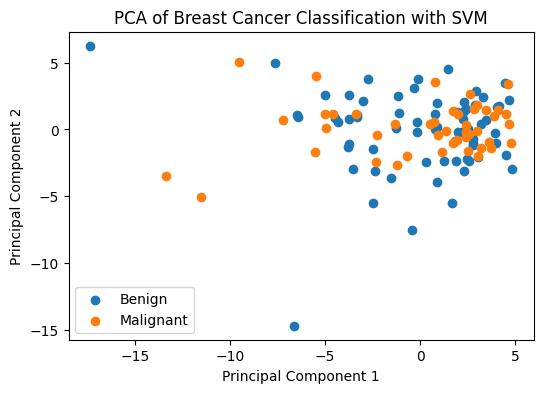

In [9]:
df = pd.read_csv('sample_dataset/breast_cancer.csv')
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values
y = np.where(y == 'M', 1, -1)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit model
model = SVM()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %0.3f" % accuracy)

# Plot results
y_test = np.where(y_test == 1, 1, 0)
y_pred = np.where(y_pred == 1, 1, 0)
plot_confusion_matrix(y_test, y_pred)

# Plot in 2D
legend_items = ['Benign', 'Malignant']
colors = plt.cm.get_cmap('tab10')
fig, ax = plt.subplots(figsize=(6, 4))
for i in range(2):
    ax.scatter(pca[y_test == i, 0], pca[y_test == i, 1],
               color=colors(i), label=legend_items[i])
plt.legend(facecolor='white', fontsize=10)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Classification with SVM')
plt.show()

## Clustering

In [10]:
df = pd.read_csv('sample_dataset/iris.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### 1. K-Means Clustering

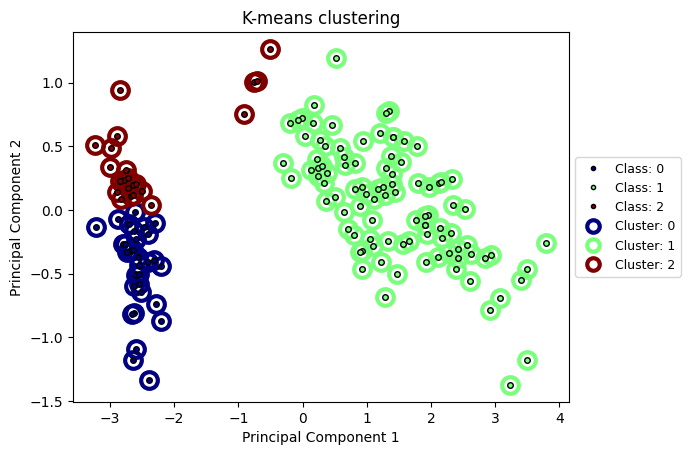

In [11]:
# Fit model
model = KMeans(n_clusters=3)
model.fit(X)

# Predict
y_pred = model.predict(X)

# Plot results
pca = PCA(n_components=2).fit_transform(X)
cluster_plot(pca, clusterid= [str(i) for i in y_pred], y=y_pred)
plt.title('K-means clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### 2. DBSCAN

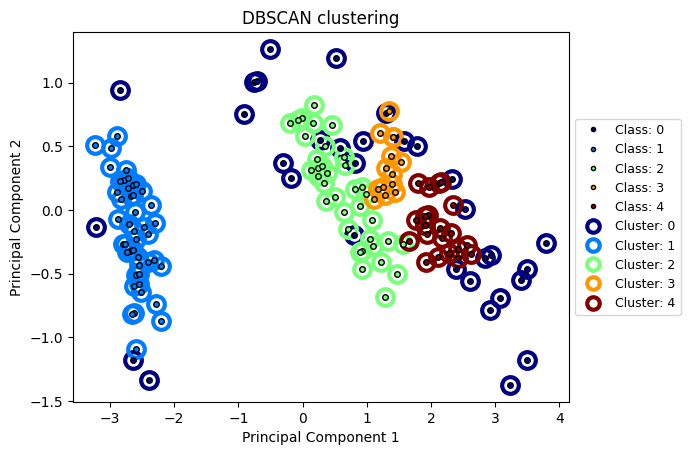

In [12]:
# Fit model
model = DBSCAN(eps=0.4, min_samples=5)
model.fit(X)

# Predict
y_pred = model.predict(X).astype(int)
y_pred = np.where(y_pred == -1, 0, y_pred)

# Plot results
pca = PCA(n_components=2).fit_transform(X)
cluster_plot(pca, clusterid= [str(i) for i in y_pred], y=y_pred)
plt.title('DBSCAN clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()